# 2015 Temperature Data Visualization And Comparaison

In this notebook we will be looking at the tempature variation between the years 2005 and 2014, then we will doing a comparison with the year 2015's temperatures and see where the it surpasses that period's record **low** or **high** temperatures.

An NOAA dataset has been stored in the file `Data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the datafile corresponds to a single observation.

It contains the following variables :

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

We will :

1. Write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day will be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make sure that the visual effectively leverages the guidelines given for effective visual design (e.g., beauty, truthfulness, functionality, and insightfulness).

The data contains temperature information for **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
# importing Python modules
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('Data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
# Loading the data
temperature_data = pd.read_csv('Data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [3]:
# Getting data during the period of 2005-2014
data = temperature_data[(temperature_data["Date"] >= "2005-01-01") & (temperature_data["Date"] <= "2014-12-31")]
# Getting data during the year 2015
data_2015 = temperature_data[(temperature_data["Date"] >= "2015-01-01") & (temperature_data["Date"] <= "2015-12-31")]

We will remove the leap days for the first data frame, but not for 2015 since it's **not** a leap year.

In [4]:
# Removing Leap days
data = data[~data.Date.str.endswith('02-29')].copy()

In [5]:
# Sorting the data by Date
data = data.sort_values("Date")

In [6]:
data.head()

ID        Date Element  Data_Value
41334  USC00208080  2005-01-01    TMAX          33
60995  USW00004848  2005-01-01    TMIN           0
60994  USW00004848  2005-01-01    TMAX         133
18232  USC00205050  2005-01-01    TMIN         -17
49823  USC00200228  2005-01-01    TMAX         150

In [7]:
data_2015.head()

ID        Date Element  Data_Value
19  USC00205563  2015-01-03    TMIN         -39
30  USC00203712  2015-03-17    TMAX         189
34  USC00200032  2015-06-06    TMIN         128
46  USW00014833  2015-08-30    TMIN         178
50  USC00202308  2015-08-30    TMIN         156

We will first start with the first data frame that contains the 2005-2014 data, then we will repeat the same steps for 2015's data.

In [8]:
# Converting the "Date" column to datetime
data["Date"] = list(map(pd.to_datetime, data["Date"]))

In [9]:
# Diving the data into two dataframes for high and low
high = data[data["Element"] == "TMAX"]
low = data[data["Element"] == "TMIN"]

In [10]:
# Getting record high and low temperature values for each day of the year during the period of 2004-2015
record_high = high.copy()
record_high['dayofyear'] = record_high['Date'].map(lambda x: x.replace(year=2015).dayofyear)
record_high = record_high.groupby("dayofyear").max()

record_low = low.copy()
record_low['dayofyear'] = record_low['Date'].map(lambda x: x.replace(year=2015).dayofyear)
record_low = record_low.groupby("dayofyear").min()

And now for 2015's data :

In [11]:
# Sorting values by Date
data_2015 = data_2015.sort_values("Date")
# Converting dates to datetime type
data_2015["Date"] = list(map(pd.to_datetime, data_2015["Date"]))
# Diving the data into two dataframes for high and low
high_2015 = data_2015[data_2015["Element"] == "TMAX"]
low_2015 = data_2015[data_2015["Element"] == "TMIN"]

# Getting record high and low temperature values for each day of the year 2015
record_high_2015 = high_2015.copy()
record_high_2015["dayofyear"] = record_high_2015["Date"].dt.dayofyear
record_high_2015 = record_high_2015.groupby("dayofyear").max()

record_low_2015 = low_2015.copy()
record_low_2015["dayofyear"] = record_low_2015["Date"].dt.dayofyear
record_low_2015 = record_low_2015.groupby("dayofyear").min()

In [12]:
# Reseting dataframes indexes
record_low = record_low.reset_index()
record_high = record_high.reset_index()
record_low_2015 = record_low_2015.reset_index()
record_high_2015 = record_high_2015.reset_index()

In [13]:
# Getting indexes of highs and lows that were broken
broken_lows = (record_low_2015[record_low_2015["Data_Value"] < record_low['Data_Value']]).index.tolist()
broken_highs = (record_high_2015[record_high_2015['Data_Value'] > record_high['Data_Value']]).index.tolist()

### Visualizing the data :

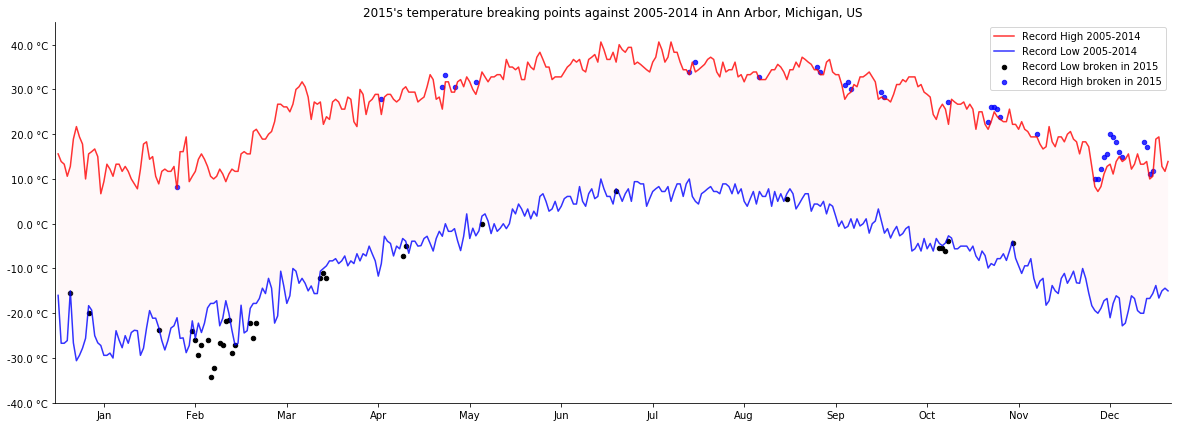

In [14]:
plt.figure(figsize=(20,7))
plt.plot(record_high["Data_Value"], c="r", alpha=0.8, label = 'Record High 2005-2014')
plt.plot(record_low["Data_Value"], c="b", alpha=0.8, label = 'Record Low 2005-2014')
plt.scatter(broken_lows, record_low_2015['Data_Value'].iloc[broken_lows], s=20, c = 'black', label = 'Record Low broken in 2015')
plt.scatter(broken_highs, record_high_2015['Data_Value'].iloc[broken_highs], s=20, c = 'b', alpha=0.8, label = 'Record High broken in 2015')
plt.legend()
plt.title("2015's temperature breaking points against 2005-2014 in Ann Arbor, Michigan, US")
plt.fill_between(range(len(record_low)),
                       record_low["Data_Value"], record_high["Data_Value"], 
                       facecolor='pink', 
                       alpha=0.11);
# Aligning plot
plt.gca().axis([-1, 365, -400, 450])

# Hiding plot spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Changing Vertical and Horizontal Ticks labels
month_ticks = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
divs = [i+15 for i in month_ticks]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(divs, month_names)
temp = [str(tick/10)+str(' °C') for tick in plt.gca().get_yticks()]
plt.gca().set_yticklabels(temp);
plt.savefig('Temp_Plot.png');